# **Movie genre classifier based on movie descriptions**

In [9]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import re
import os

# Load datasets
train_path = r"C:\Users\ADMIN\PycharmProjects\ML\CODSOFT\Genre Classification Dataset\train_data.txt"
test_path = r"C:\Users\ADMIN\PycharmProjects\ML\CODSOFT\Genre Classification Dataset\test_data_solution.txt"

movies_test = pd.read_csv(test_path, sep=':::', header=None, names=['title', 'genre', 'description'], engine='python')
movies = pd.read_csv(train_path, sep=':::', header=None, names=['title', 'genre', 'description'], engine='python')



In [10]:

# Data Cleaning
space = re.compile('[/(){}\[\]\|@,;]')
symbols = re.compile('[^0-9a-z #+_]')
stopwords_set = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = space.sub(' ', text)
    text = symbols.sub('', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join(word for word in text.split() if word not in stopwords_set)
    return text

movies['description'] = movies['description'].apply(clean_text)

# Generate vocabulary
def voc_generator(n):
    vocabulary = set()
    for genre in movies['genre'].unique():
        desc = movies[movies['genre'] == genre]['description'].str.cat(sep=' ')
        tokens = word_tokenize(desc)
        frequency_dist = nltk.FreqDist(tokens)
        common_words = set([word for word, _ in frequency_dist.most_common(n)])
        vocabulary.update(common_words)
    return sorted(vocabulary)


In [11]:

# Split the dataset
X = movies['description']
y = movies['genre']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(movies, movies['genre']):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]


Vocabulary size: 500
Vectorizer: CountVectorizer(vocabulary=['abandoned', 'abc', 'abducted', 'abilities',
                            'ability', 'able', 'abuse', 'academy', 'accept',
                            'access', 'accident', 'according', 'accused', 'ace',
                            'across', 'act', 'acting', 'action', 'actions',
                            'active', 'activities', 'actor', 'actors',
                            'actress', 'acts', 'actual', 'actually', 'adam',
                            'added', 'addition', ...])
Classifier: MultinomialNB()
Accuracy: 0.5305727197270128
               precision    recall  f1-score   support

      action        0.35      0.43      0.39       263
       adult        0.54      0.63      0.58       118
   adventure        0.27      0.21      0.23       155
   animation        0.27      0.23      0.25       100
   biography        0.00      0.00      0.00        53
      comedy        0.54      0.46      0.50      1490
       crime  

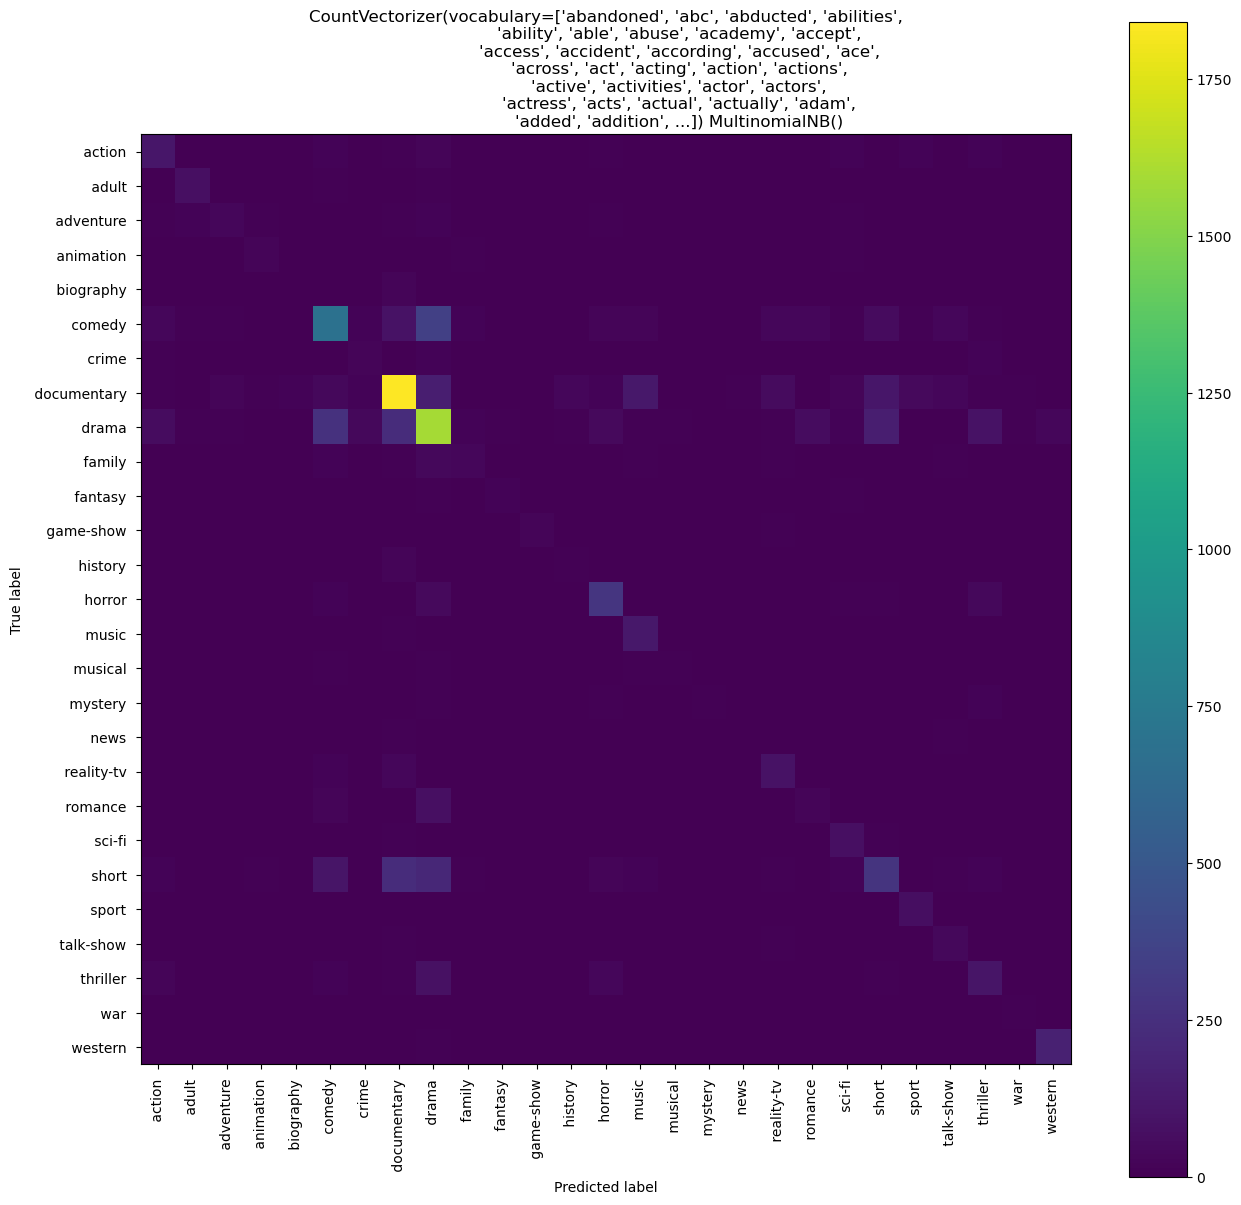

Vocabulary size: 500
Vectorizer: CountVectorizer(vocabulary=['abandoned', 'abc', 'abducted', 'abilities',
                            'ability', 'able', 'abuse', 'academy', 'accept',
                            'access', 'accident', 'according', 'accused', 'ace',
                            'across', 'act', 'acting', 'action', 'actions',
                            'active', 'activities', 'actor', 'actors',
                            'actress', 'acts', 'actual', 'actually', 'adam',
                            'added', 'addition', ...])
Classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
Accuracy: 0.5523379138614775
               precision    recall  f1-score   support

      action        0.42      0.35      0.38       263
       adult        0.62      0.47      0.53       118
   adventure        0.27      0.15      0.20       155
   animation        0.24      0.16      0.19       100
   biography        0.00      0.00      0.00        53
      comedy        0.51      0.

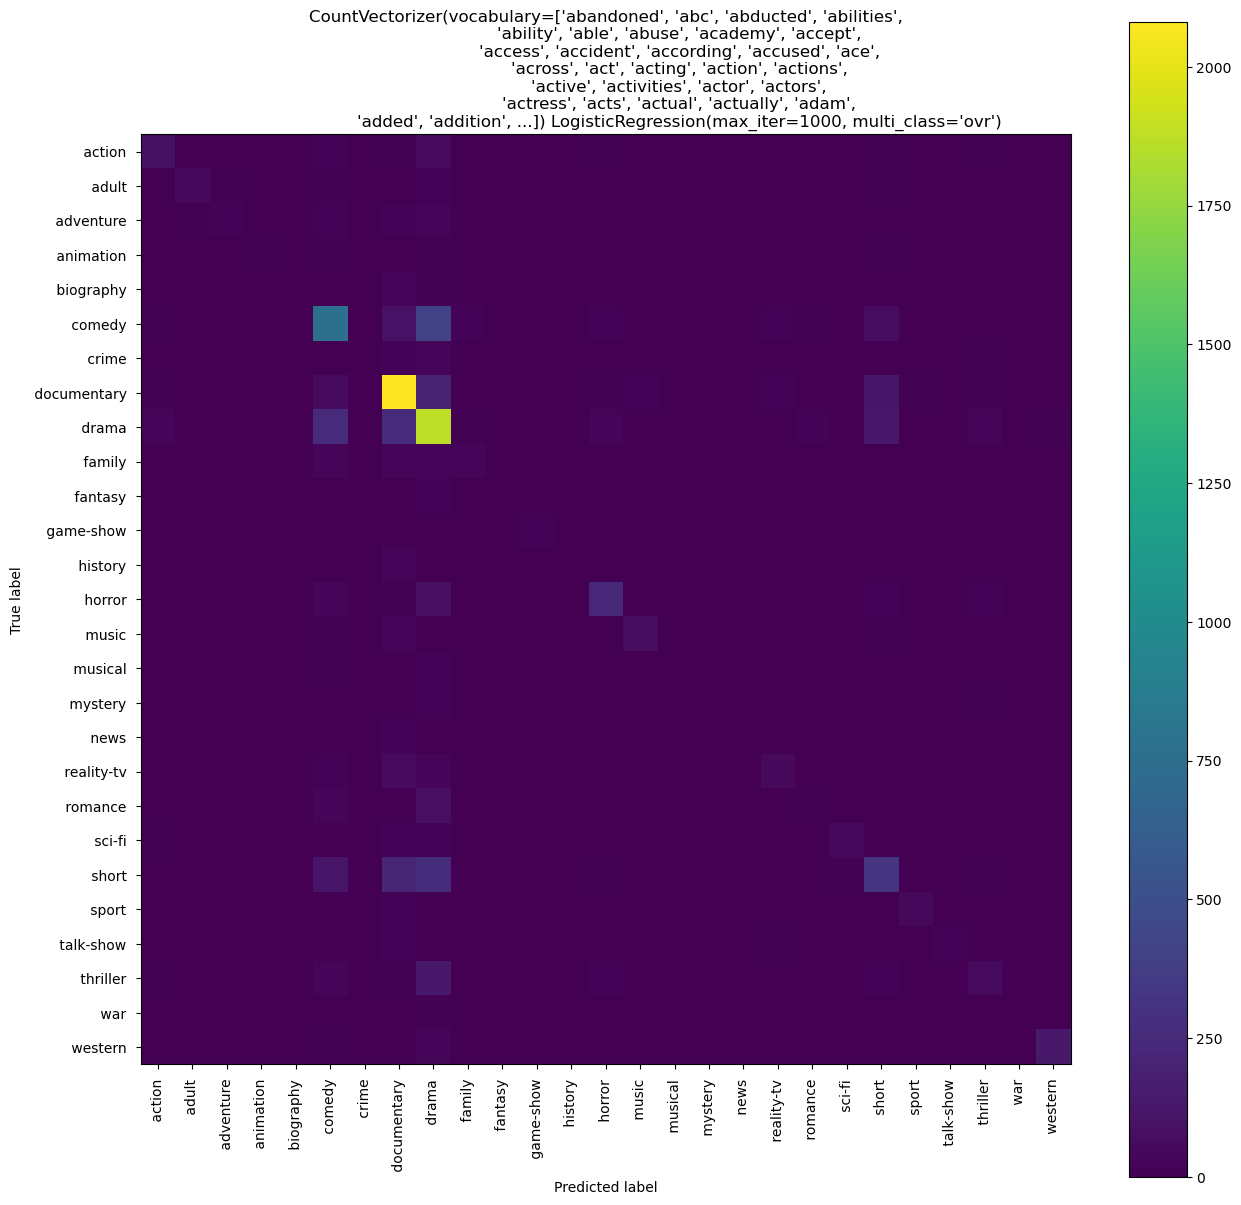

Vocabulary size: 500
Vectorizer: CountVectorizer(vocabulary=['abandoned', 'abc', 'abducted', 'abilities',
                            'ability', 'able', 'abuse', 'academy', 'accept',
                            'access', 'accident', 'according', 'accused', 'ace',
                            'across', 'act', 'acting', 'action', 'actions',
                            'active', 'activities', 'actor', 'actors',
                            'actress', 'acts', 'actual', 'actually', 'adam',
                            'added', 'addition', ...])
Classifier: LogisticRegression(max_iter=1000, multi_class='multinomial')
Accuracy: 0.5377663008392511
               precision    recall  f1-score   support

      action        0.40      0.38      0.39       263
       adult        0.60      0.49      0.54       118
   adventure        0.22      0.17      0.19       155
   animation        0.23      0.20      0.21       100
   biography        0.07      0.02      0.03        53
      comedy        0.50

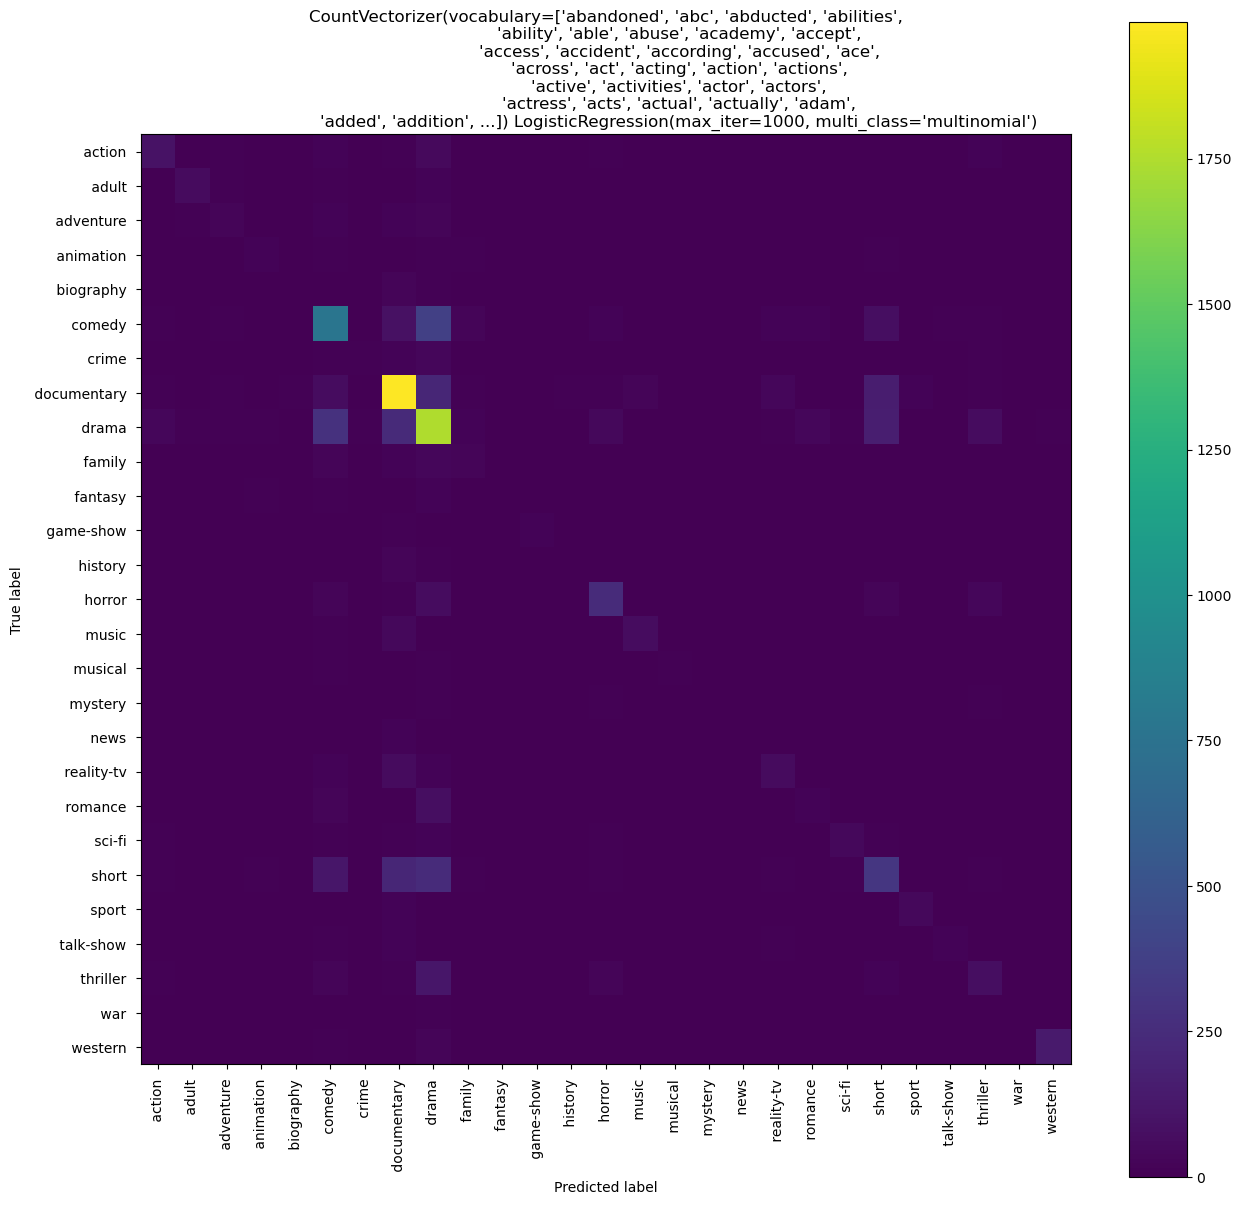

Vocabulary size: 1000
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', 'abandoned', 'abbie', 'abc',
                            'abducted', 'abduction', 'abilities', 'ability',
                            'able', 'aboard', 'abs', 'abstract', 'abuse',
                            'abusive', 'academy', 'accept', 'accepts', 'access',
                            'accident', 'accidentally', 'acclaimed',
                            'accompanied', 'according', 'account', 'accounts',
                            'accumulated', 'accused', 'accuses', ...])
Classifier: MultinomialNB()
Accuracy: 0.5555658028220972
               precision    recall  f1-score   support

      action        0.37      0.49      0.42       263
       adult        0.59      0.60      0.59       118
   adventure        0.31      0.23      0.27       155
   animation        0.33      0.22      0.26       100
   biography        0.05      0.02      0.03        53
      comedy        0.55      0.50      0.53      1490


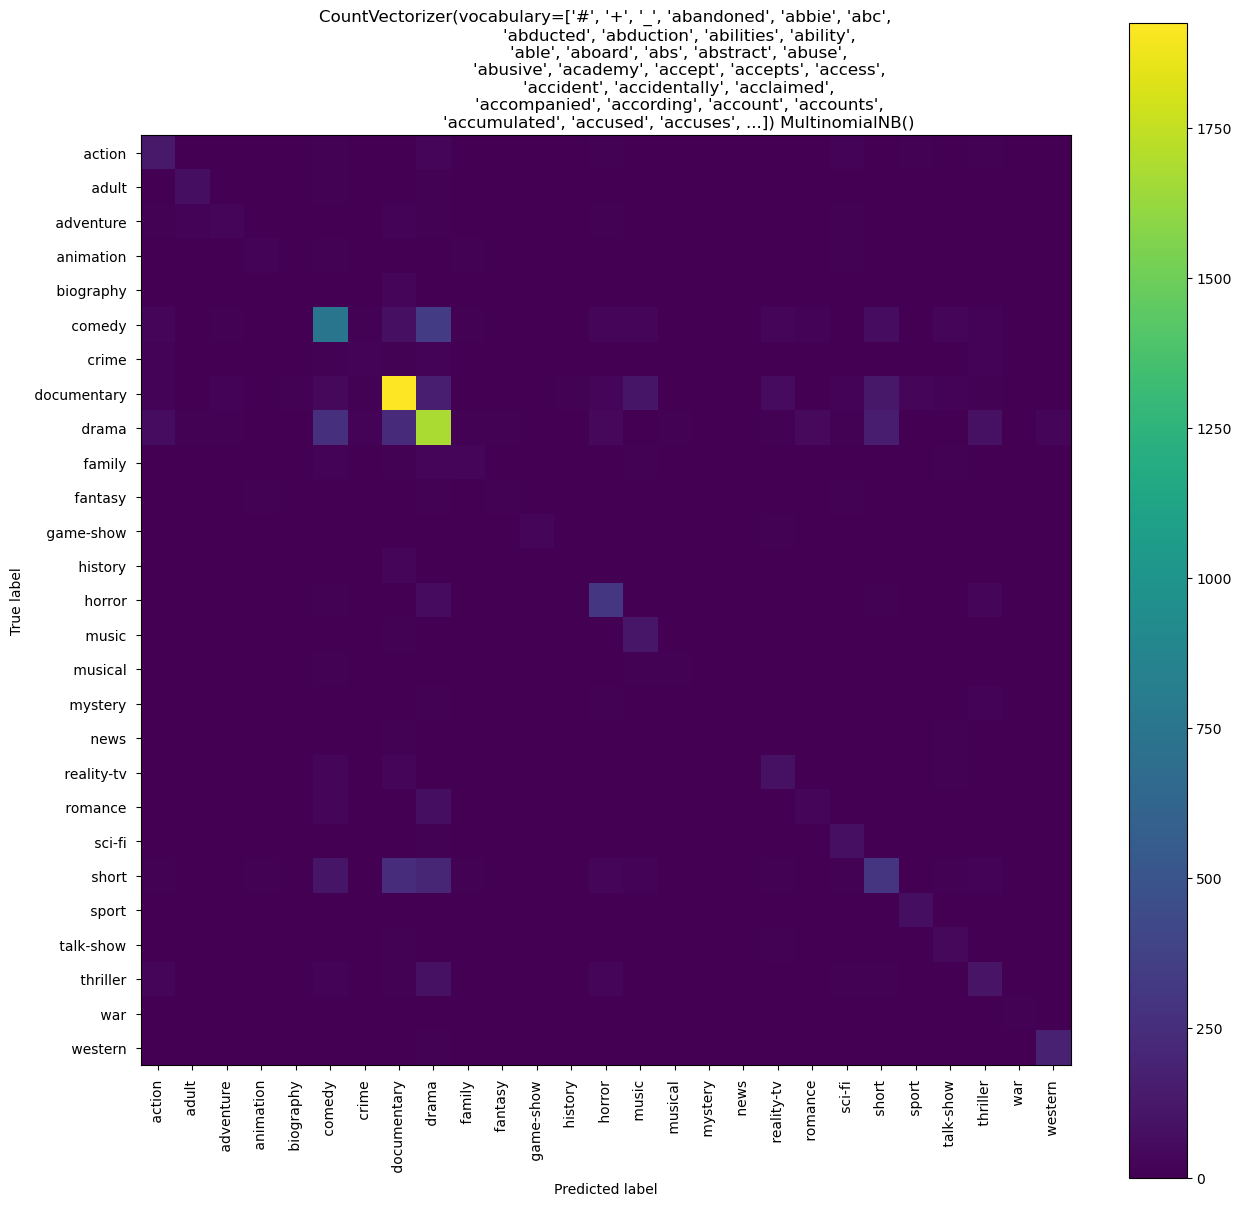

Vocabulary size: 1000
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', 'abandoned', 'abbie', 'abc',
                            'abducted', 'abduction', 'abilities', 'ability',
                            'able', 'aboard', 'abs', 'abstract', 'abuse',
                            'abusive', 'academy', 'accept', 'accepts', 'access',
                            'accident', 'accidentally', 'acclaimed',
                            'accompanied', 'according', 'account', 'accounts',
                            'accumulated', 'accused', 'accuses', ...])
Classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
Accuracy: 0.55390574564235
               precision    recall  f1-score   support

      action        0.41      0.36      0.38       263
       adult        0.68      0.43      0.53       118
   adventure        0.30      0.19      0.23       155
   animation        0.31      0.18      0.23       100
   biography        0.00      0.00      0.00        53
      comedy        

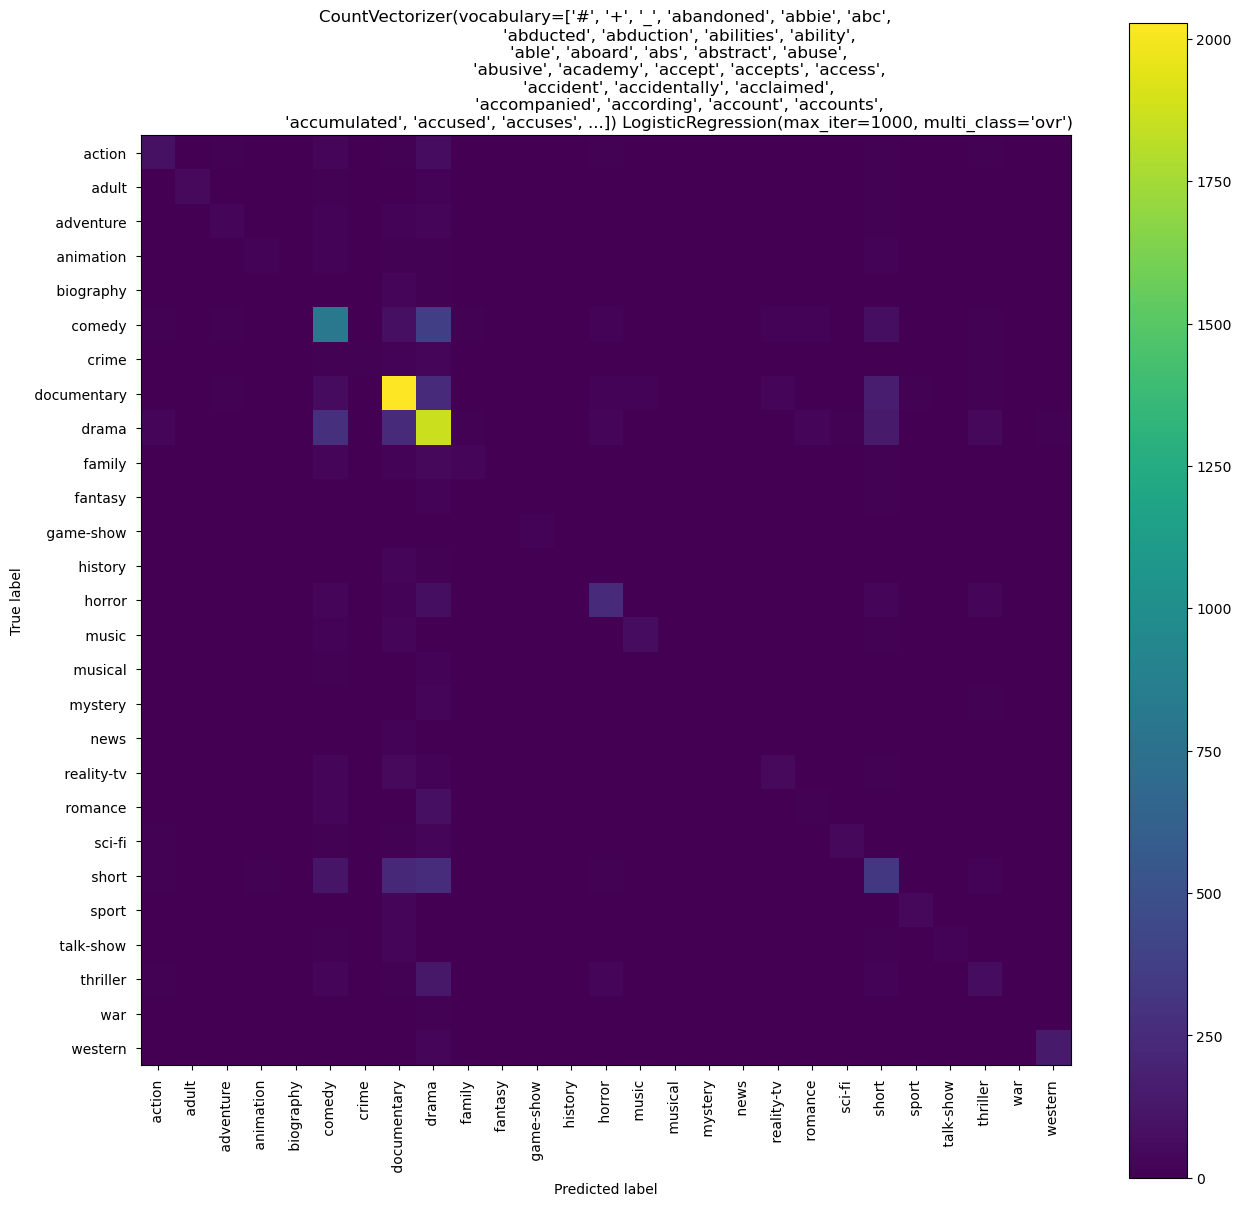

Vocabulary size: 1000
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', 'abandoned', 'abbie', 'abc',
                            'abducted', 'abduction', 'abilities', 'ability',
                            'able', 'aboard', 'abs', 'abstract', 'abuse',
                            'abusive', 'academy', 'accept', 'accepts', 'access',
                            'accident', 'accidentally', 'acclaimed',
                            'accompanied', 'according', 'account', 'accounts',
                            'accumulated', 'accused', 'accuses', ...])
Classifier: LogisticRegression(max_iter=1000, multi_class='multinomial')
Accuracy: 0.5438531771649913
               precision    recall  f1-score   support

      action        0.40      0.39      0.40       263
       adult        0.66      0.48      0.56       118
   adventure        0.24      0.19      0.21       155
   animation        0.25      0.17      0.20       100
   biography        0.11      0.02      0.03        53
      come

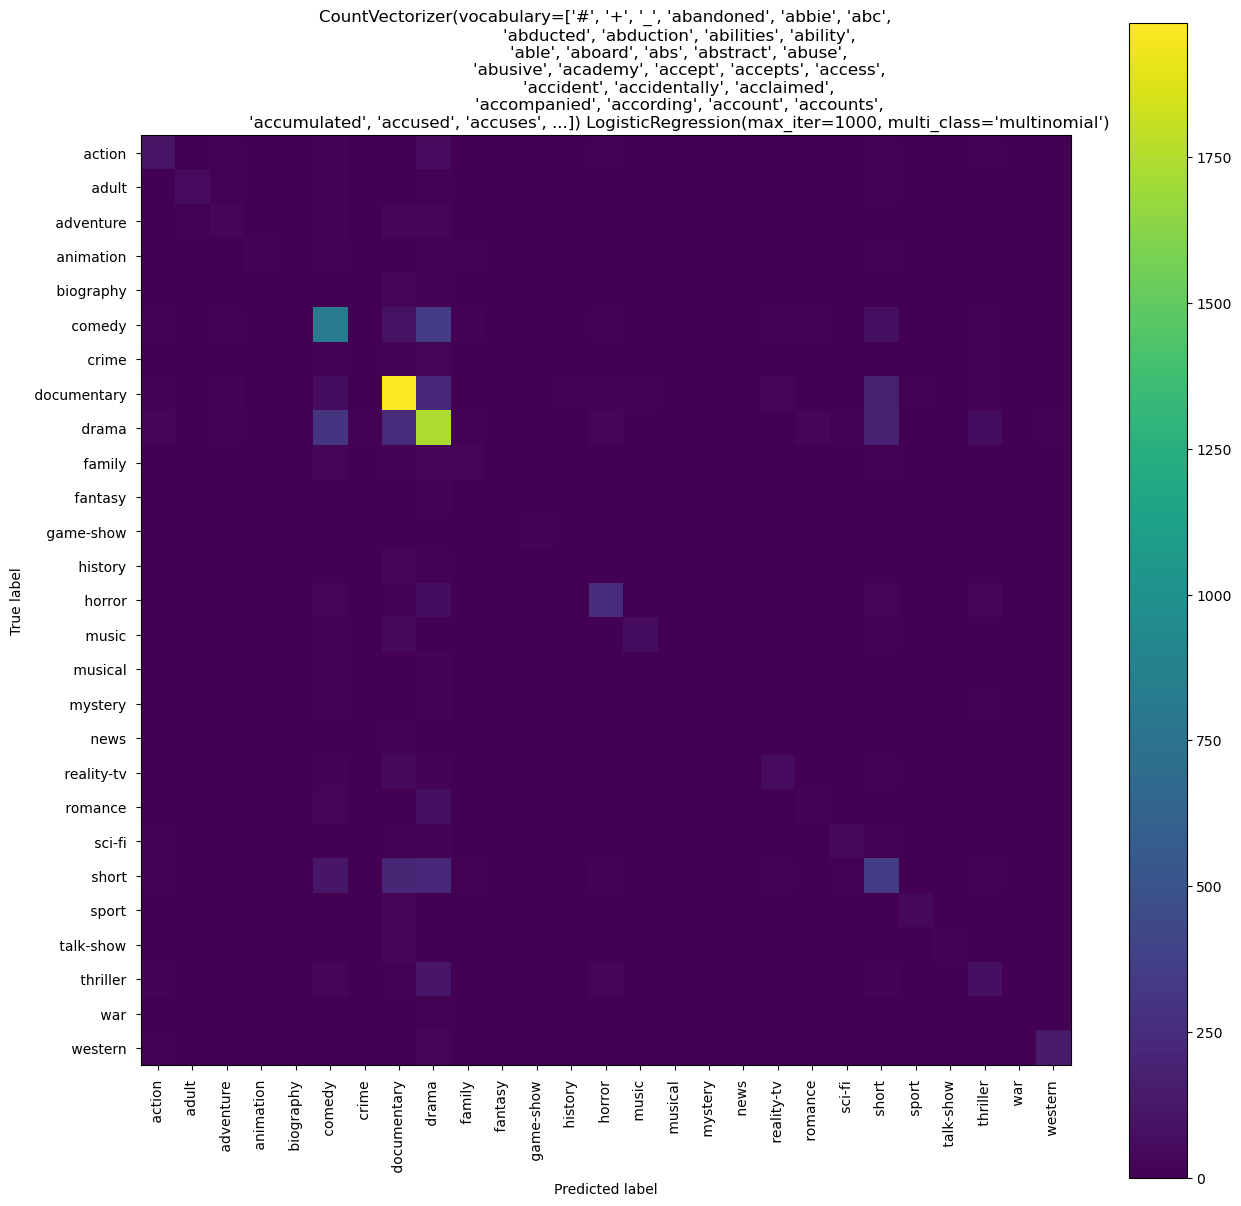

Vocabulary size: 1500
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', '_the', 'aaron', 'aarti',
                            'abandoned', 'abbie', 'abby', 'abc', 'abducted',
                            'abduction', 'abilities', 'ability', 'able',
                            'aboard', 'aboke', 'abraham', 'abroad', 'abs',
                            'absence', 'abstract', 'absurd', 'absurdity',
                            'abuse', 'abusive', 'abyss', 'academy', 'accept',
                            'accepting', ...])
Classifier: MultinomialNB()
Accuracy: 0.5659872728949553
               precision    recall  f1-score   support

      action        0.39      0.47      0.42       263
       adult        0.61      0.59      0.60       118
   adventure        0.29      0.22      0.25       155
   animation        0.42      0.20      0.27       100
   biography        0.18      0.04      0.06        53
      comedy        0.56      0.54      0.55      1490
       crime        0.16      

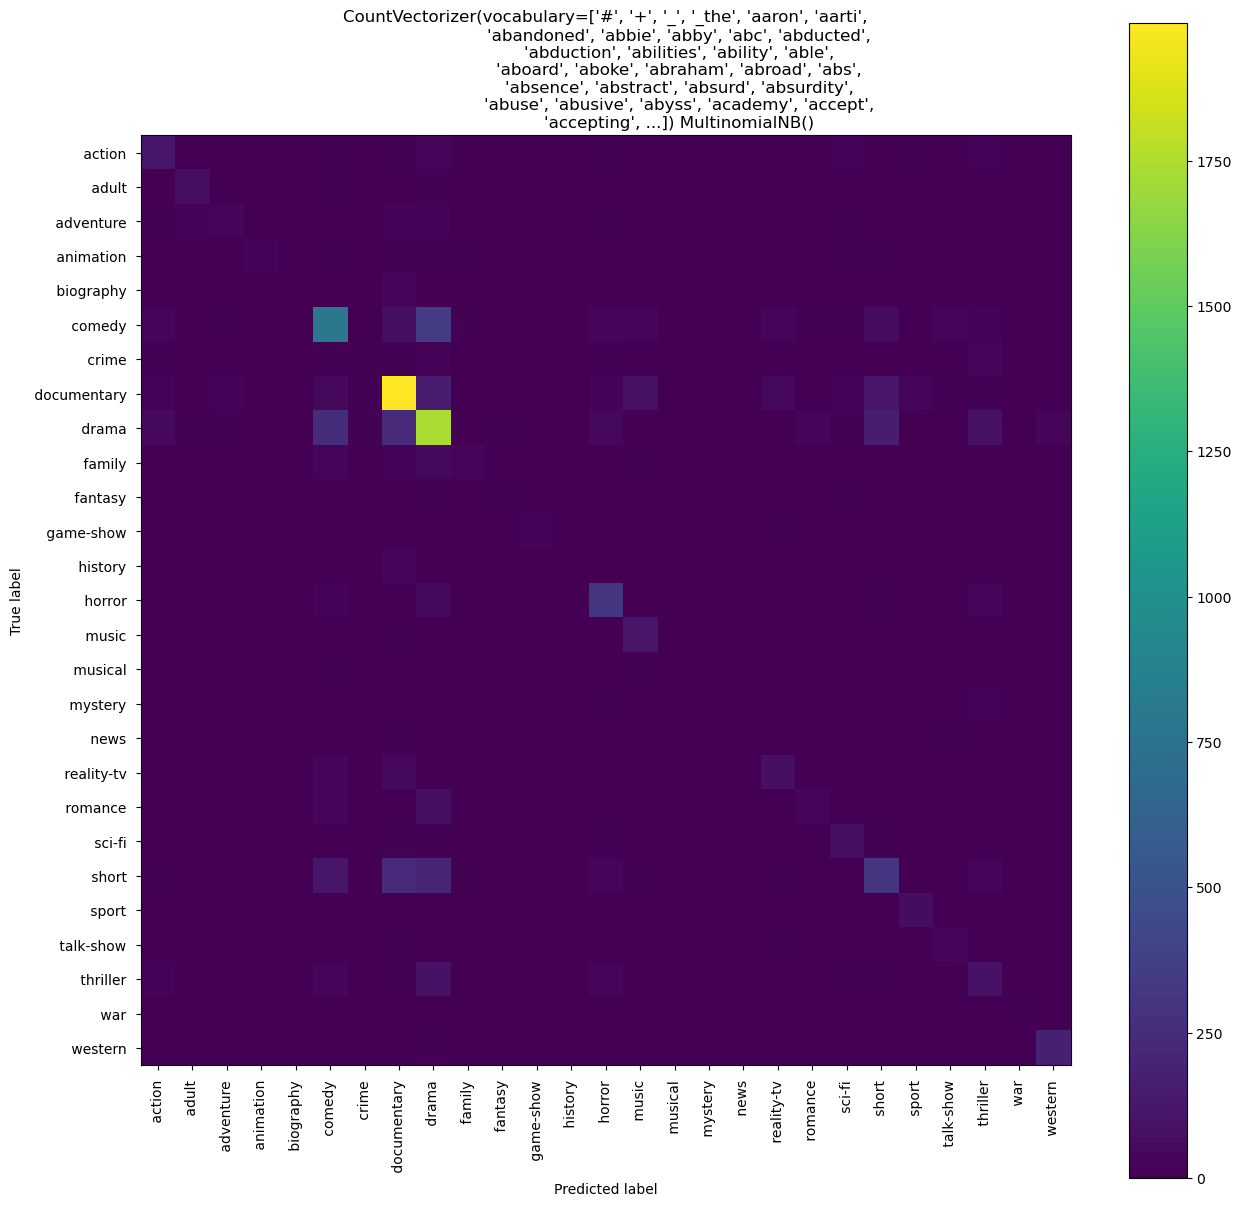

Vocabulary size: 1500
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', '_the', 'aaron', 'aarti',
                            'abandoned', 'abbie', 'abby', 'abc', 'abducted',
                            'abduction', 'abilities', 'ability', 'able',
                            'aboard', 'aboke', 'abraham', 'abroad', 'abs',
                            'absence', 'abstract', 'absurd', 'absurdity',
                            'abuse', 'abusive', 'abyss', 'academy', 'accept',
                            'accepting', ...])
Classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
Accuracy: 0.5537212948446002
               precision    recall  f1-score   support

      action        0.44      0.38      0.41       263
       adult        0.72      0.42      0.53       118
   adventure        0.33      0.19      0.24       155
   animation        0.33      0.19      0.24       100
   biography        0.00      0.00      0.00        53
      comedy        0.52      0.57      0.54    

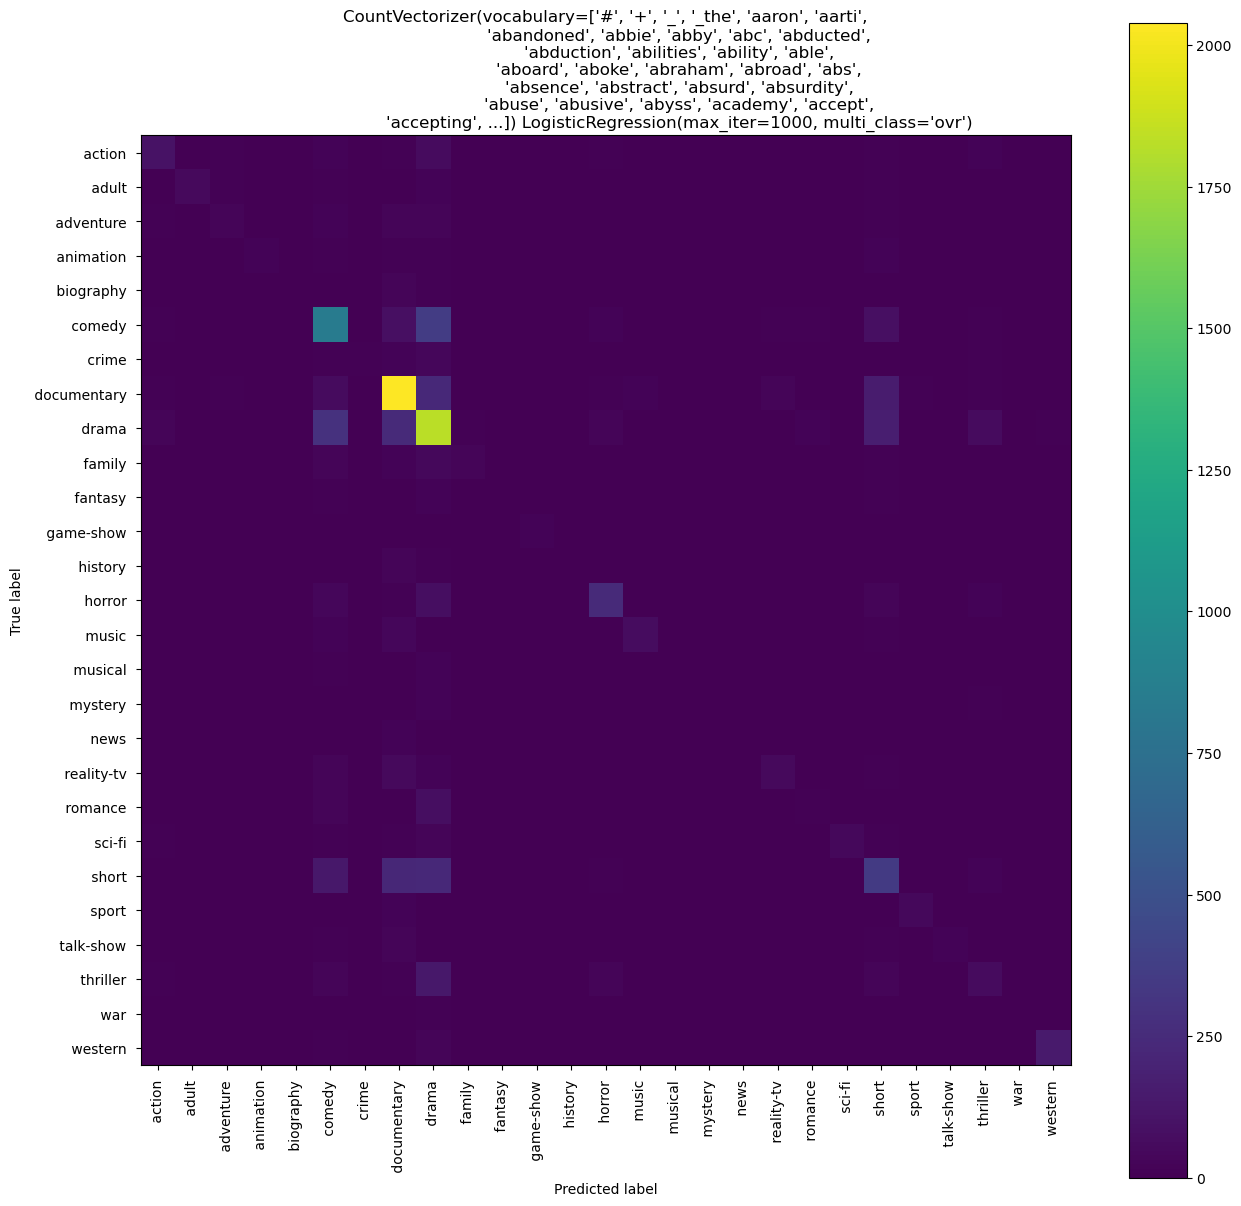

Vocabulary size: 1500
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', '_the', 'aaron', 'aarti',
                            'abandoned', 'abbie', 'abby', 'abc', 'abducted',
                            'abduction', 'abilities', 'ability', 'able',
                            'aboard', 'aboke', 'abraham', 'abroad', 'abs',
                            'absence', 'abstract', 'absurd', 'absurdity',
                            'abuse', 'abusive', 'abyss', 'academy', 'accept',
                            'accepting', ...])
Classifier: LogisticRegression(max_iter=1000, multi_class='multinomial')
Accuracy: 0.5447754311537397
               precision    recall  f1-score   support

      action        0.42      0.38      0.40       263
       adult        0.63      0.45      0.52       118
   adventure        0.28      0.19      0.23       155
   animation        0.26      0.18      0.21       100
   biography        0.17      0.02      0.03        53
      comedy        0.52      0.58      

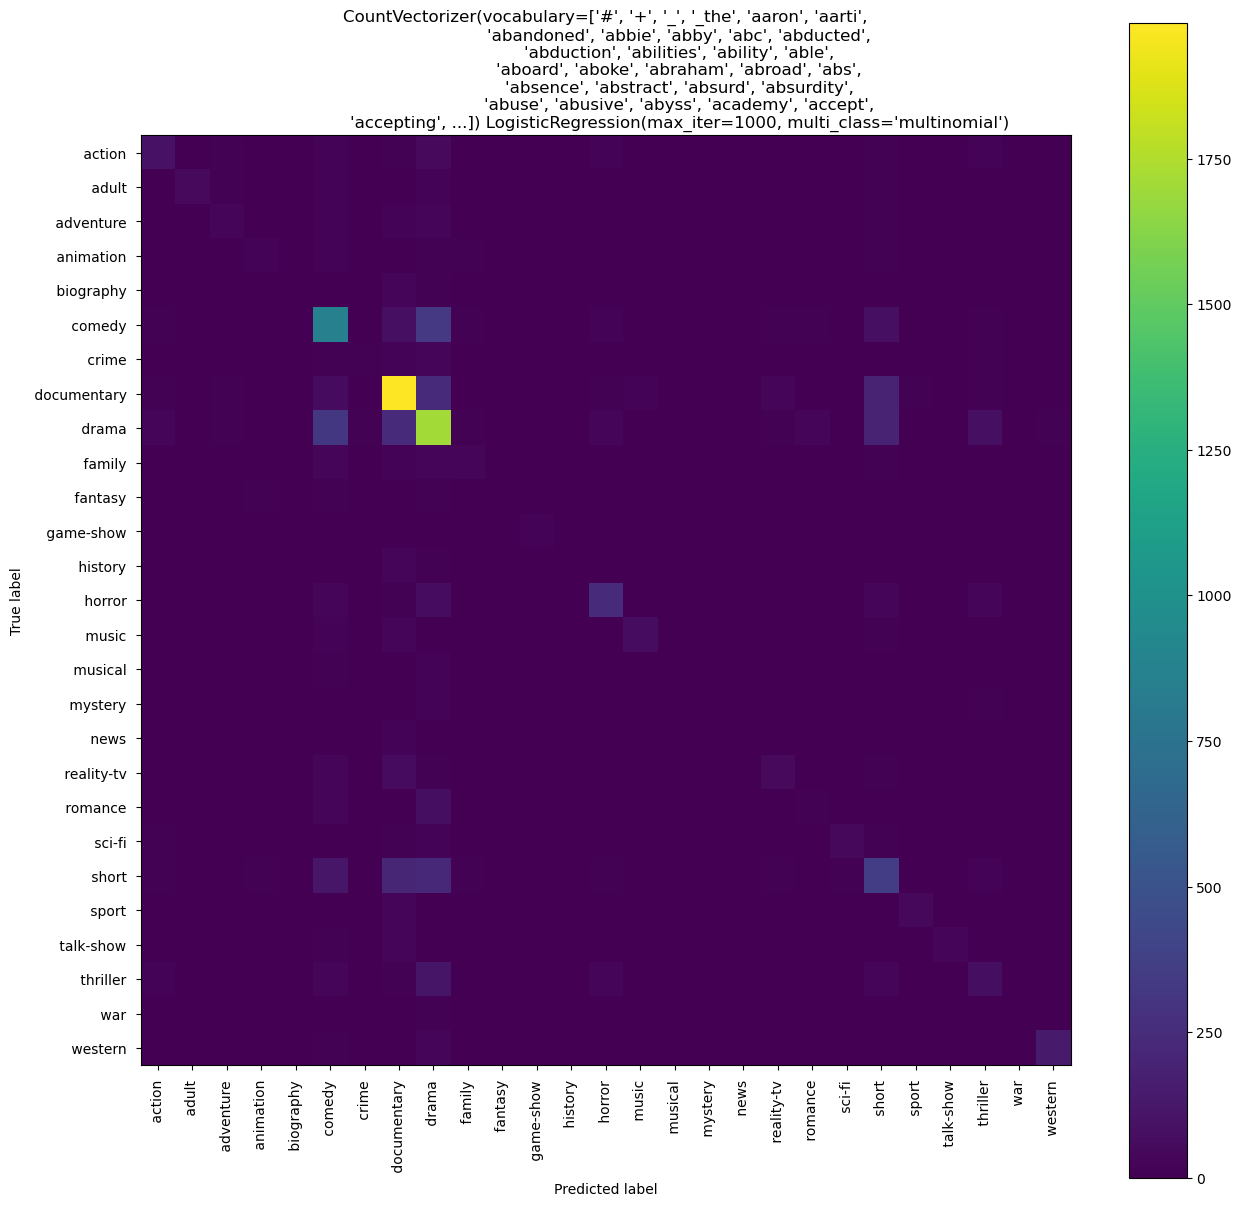

Vocabulary size: 2000
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', '_big', '_matador', '_the', 'aaron',
                            'aarti', 'abandon', 'abandoned', 'abbie', 'abby',
                            'abc', 'abcs', 'abduct', 'abducted', 'abductees',
                            'abduction', 'abducts', 'abilities', 'ability',
                            'able', 'aboard', 'aboke', 'aboriginal', 'abound',
                            'abraham', 'abroad', 'abs', 'absence', ...])
Classifier: MultinomialNB()
Accuracy: 0.5763165175689385
               precision    recall  f1-score   support

      action        0.39      0.46      0.42       263
       adult        0.62      0.56      0.59       118
   adventure        0.32      0.22      0.26       155
   animation        0.40      0.16      0.23       100
   biography        0.29      0.04      0.07        53
      comedy        0.55      0.56      0.56      1490
       crime        0.19      0.06      0.09       101
 doc

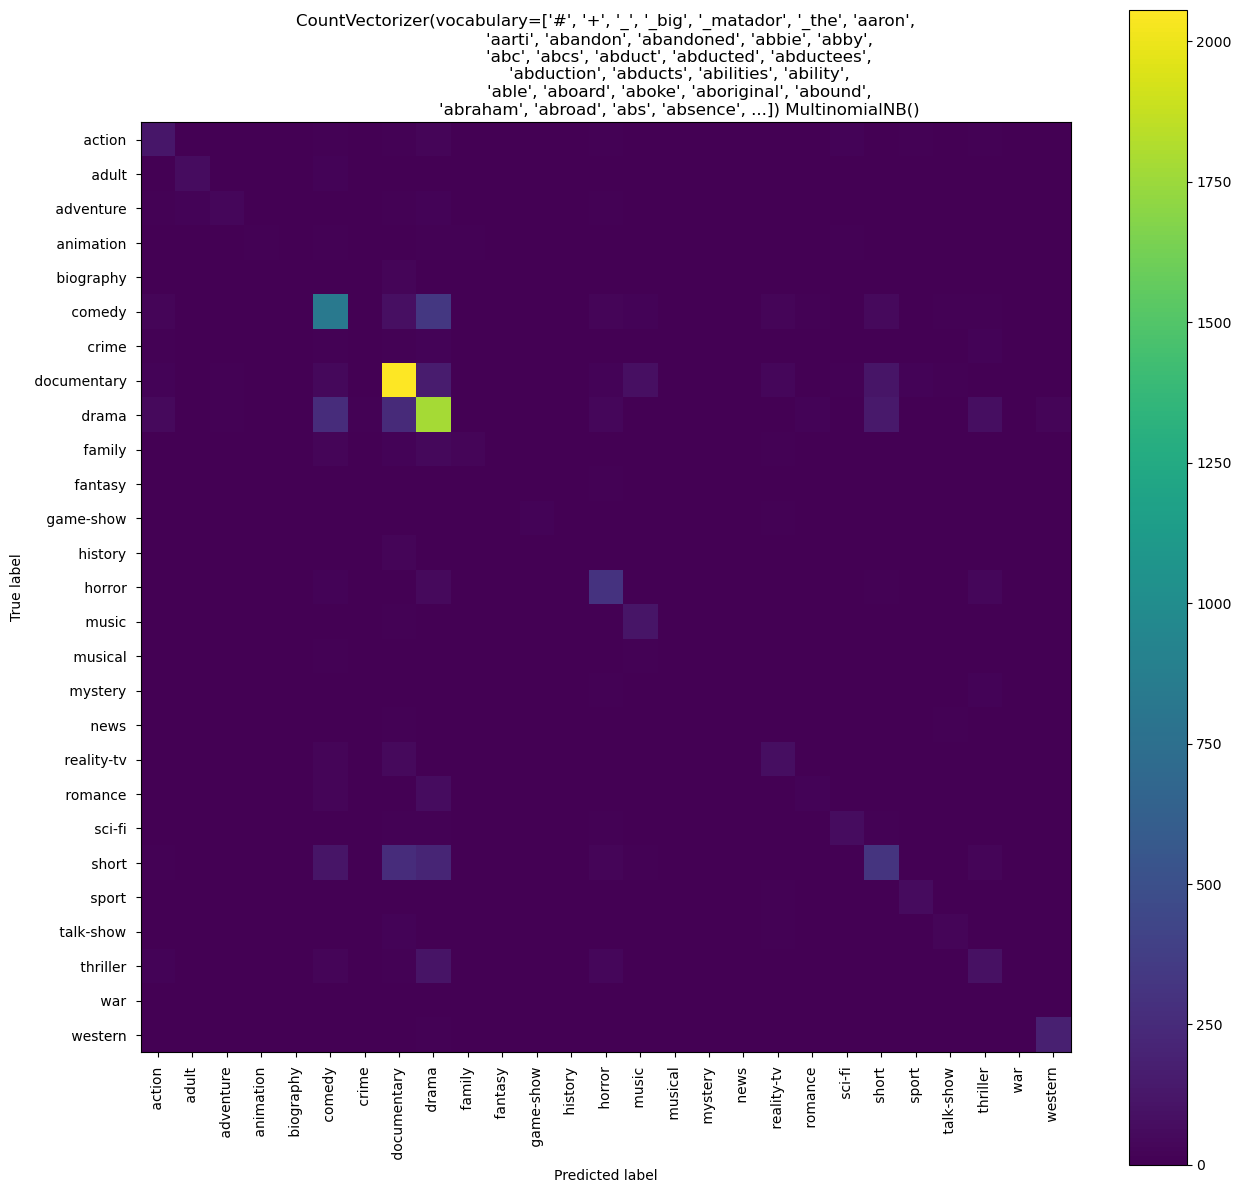

Vocabulary size: 2000
Vectorizer: CountVectorizer(vocabulary=['#', '+', '_', '_big', '_matador', '_the', 'aaron',
                            'aarti', 'abandon', 'abandoned', 'abbie', 'abby',
                            'abc', 'abcs', 'abduct', 'abducted', 'abductees',
                            'abduction', 'abducts', 'abilities', 'ability',
                            'able', 'aboard', 'aboke', 'aboriginal', 'abound',
                            'abraham', 'abroad', 'abs', 'absence', ...])
Classifier: LogisticRegression(max_iter=1000, multi_class='ovr')
Accuracy: 0.5550124504288481
               precision    recall  f1-score   support

      action        0.42      0.35      0.38       263
       adult        0.64      0.42      0.51       118
   adventure        0.33      0.19      0.24       155
   animation        0.38      0.20      0.26       100
   biography        0.00      0.00      0.00        53
      comedy        0.51      0.57      0.54      1490
       crime        0.

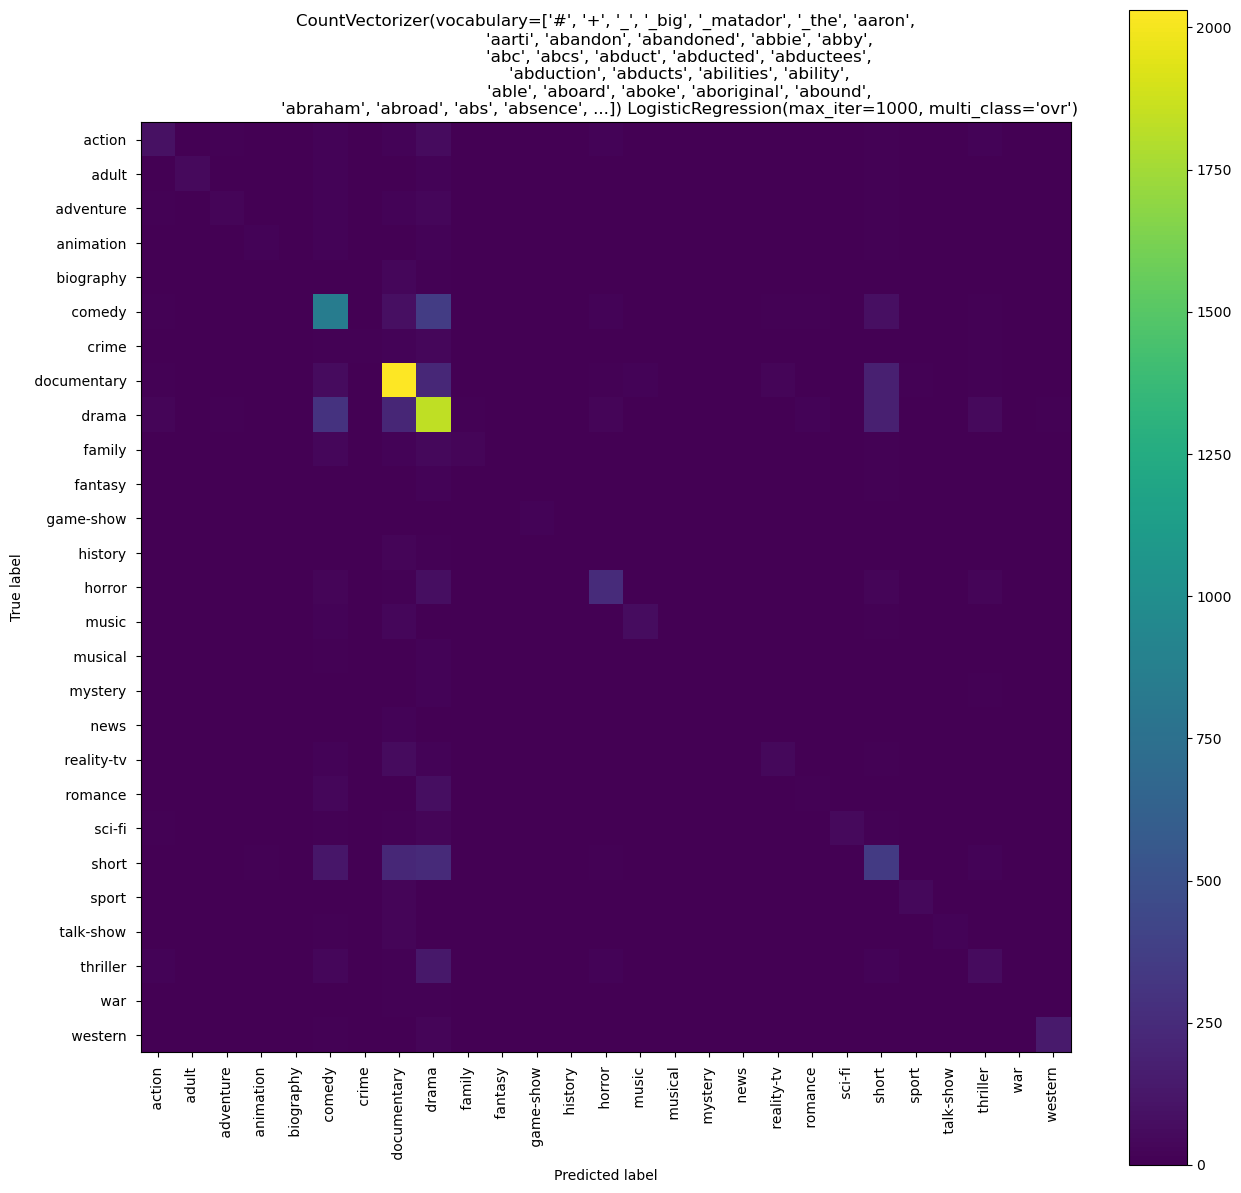

Vocabulary size: 2000


In [12]:

# Model testing function
def model_generator(X_train, y_train, X_test, y_test, vectorizer=CountVectorizer(vocabulary=voc_generator(100)), model=MultinomialNB()):
    pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print('Vectorizer:', vectorizer)
    print('Classifier:', model)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    fig, ax = plt.subplots(figsize=(15, 15))
    disp.plot(include_values=False, xticks_rotation='vertical', ax=ax)
    plt.title(f"{vectorizer} {model}")
    plt.show()

    return pipeline

# Test models
voc_size = [500, 1000, 1500, 2000]
classifiers = [MultinomialNB(), LogisticRegression(max_iter=1000, multi_class='ovr'), LogisticRegression(max_iter=1000, multi_class='multinomial')]
models = []

for size in voc_size:
    vectorizer = CountVectorizer(vocabulary=voc_generator(size))
    for clf in classifiers:
        print(f"Vocabulary size: {size}")
        models.append(model_generator(X_train, y_train, X_test, y_test, vectorizer, clf))

# Final model selection and tuning
best_model = MultinomialNB(alpha=0.7)
vectorizer = CountVectorizer(vocabulary=voc_generator(1000))
final_model = model_generator(X_train, y_train, X_test, y_test, vectorizer, best_model)

# Test the final model on the test set
X_test_final = movies_test['description']
y_test_final = movies_test['genre']
y_pred_final = final_model.predict(X_test_final)

print('################## FINAL RESULTS ##################')
print('Accuracy:', accuracy_score(y_test_final, y_pred_final))
print(classification_report(y_test_final, y_pred_final))

cm_final = confusion_matrix(y_test_final, y_pred_final, labels=final_model.classes_)
disp_final = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=final_model.classes_)
fig, ax = plt.subplots(figsize=(15, 15))
disp_final.plot(include_values=False, xticks_rotation='vertical', ax=ax)
plt.title(f"Final Model: {best_model}")
plt.show()
